Shape: (10000, 7)
0
Train size: (8000, 6) Test size: (2000, 6)
CV accuracy scores: [1. 1. 1. 1. 1.]
CV mean accuracy: 1.0
Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1022
           1       1.00      1.00      1.00       978

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



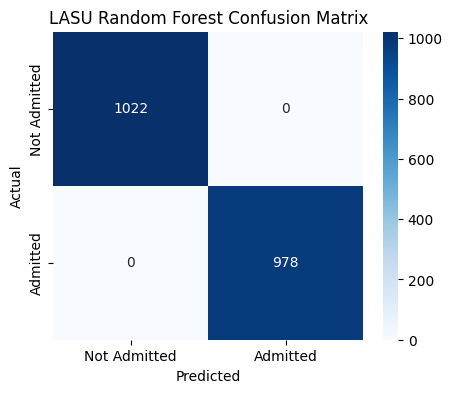

LASU model saved successfully!


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib
import os

# Load LASU processed dataset
lasu_df = pd.read_csv("../../Data/LASU_processed.csv")
print("Shape:", lasu_df.shape)
lasu_df.head()

# Check target column for missing values
print(lasu_df['admitted_numeric'].isna().sum())

# Drop rows with missing targets
lasu_df = lasu_df.dropna(subset=['admitted_numeric'])

# Define features (X) and target (y)
X = lasu_df[['utme_score', 'screening_score', 'faculty', 'department',
             'olevel_passed', 'olevel_avg_points']]
y = lasu_df['admitted_numeric'].astype(int)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

# Preprocessing (OneHotEncode categorical features)
categorical_features = ['faculty', 'department']
numeric_features = ['utme_score', 'screening_score', 'olevel_passed', 'olevel_avg_points']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', MinMaxScaler(), numeric_features)
    ]
)

# Random Forest Model
random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))
])

# Train
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)


# Cross-validate quickly
cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("CV accuracy scores:", cv_scores)
print("CV mean accuracy:", cv_scores.mean())

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Admitted","Admitted"], yticklabels=["Not Admitted","Admitted"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LASU Random Forest Confusion Matrix")
plt.savefig("static/lasu_confusion.png") if os.path.exists("static") else plt.show()

# Save Model
os.makedirs("../../Models", exist_ok=True)
joblib.dump(random_forest, "../../Models/lasu_admission_model.pkl")
print("LASU model saved successfully!")


count    10000.000000
mean        70.059756
std         10.823392
min         40.750000
25%         61.250000
50%         70.120000
75%         78.750000
max         96.620000
Name: screening_score, dtype: float64


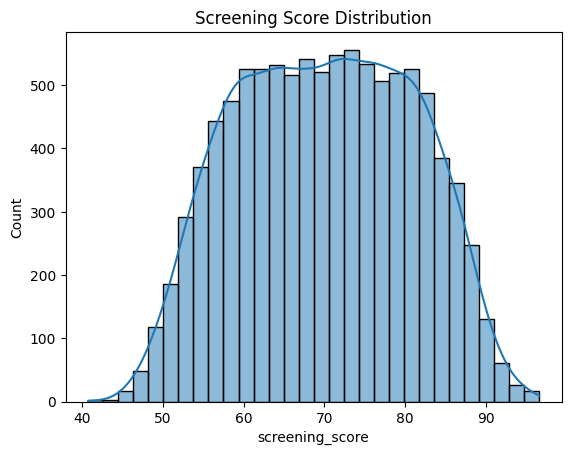

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../Data/LASU_processed.csv")

print(df["screening_score"].describe())
sns.histplot(df["screening_score"], bins=30, kde=True)
plt.title("Screening Score Distribution")
plt.show()
